In [ ]:
from google.colab import drive
drive.mount('/content/drive' # , force_remount=True
)

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 10.2 MB/s eta 0:00:00


In [ ]:
#video_path = "/content/drive/MyDrive/GolfDB/swing_video_files/first_try/Copy of IMG_2275.MOV"

In [ ]:
# Face on videos
video_numbers_1 = [2167, 2168, 2169, 2170, 2171, 2172, 2175, 2176, 2177,                       # 2174,
                   2178, 2179, 2180, 2181, 2182, 2183, 2184, 2186, 2187, 2188,
                   2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198,
                   2199, 2200, 2201, 2202, 2203, 2205, 2206, 2207, 2208, 2209,
                   2210, 2212, 2213, 2214, 2215, 2216, 2218, 2219, 2220, 2221,
                   2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231,
                   2233, 2234, 2235, 2236, 2237, 2238, 2250, 2251, 2254, 2255,
                   2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2266,
                   2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276,
                   2277, 2278, 2279, 2280, 2281, 2282, 2283, 2285, 2286, 2287, 2174]

# Down the line videos
video_numbers_2 = [7869, 7870, 7871, 7872, 7873, 7874,  7877, 7878, 7879,                     # 7876,
                   7880, 7881, 7882, 7883, 7884, 7885, 7886, 7888, 7889, 7890,
                   7891, 7892, 7893, 7894, 7895, 7896, 7897, 7898, 7899, 7900,
                   7901, 7902, 7903, 7904, 7905, 7907, 7908, 7909, 7910, 7911,
                   7912, 7914, 7915, 7916, 7917, 7918, 7920, 7921, 7922, 7923,
                   7924, 7925, 7926, 7927, 7928, 7929, 7930, 7931, 7932, 7933,
                   7935, 7936, 7937, 7938, 7939, 7940, 7958, 7959, 7962, 7963,
                   7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 7974,
                   7975, 7976, 7977, 7978, 7979, 7980, 7981, 7982, 7983, 7984,
                   7985, 7986, 7987, 7988, 7989, 7990, 7991, 7993, 7994, 7995, 7876]


In [ ]:
import cv2
import pandas as pd
from ultralytics import YOLO

# Initialize YOLO model
model = YOLO("/content/drive/MyDrive/GolfDB/train_yolo_model/code/runs_1920_2/detect/train/weights/best.pt")

base_video_path = "/content/drive/MyDrive/GolfDB/swing_video_files/face_on_official/IMG_{}.MOV"
all_data = []  # a list to hold dataframes for all videos

# Assuming video_numbers_1 is a list of all the video numbers you want to process
#video_numbers_1 = list(range(2275, 2275 + 200))  # Modify as needed

for video_num in video_numbers_1[90:100]:
    video_path = base_video_path.format(video_num)
    cap = cv2.VideoCapture(video_path)

    # Initialize frames for the current video
    frames = []

    cap.set(cv2.CAP_PROP_POS_FRAMES, 200)

    frame_counter = 0

    # Loop over frames in the video
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Add frame to frames list
        frames.append(frame)

        frame_counter += 1

        if frame_counter >= 1000:
          break

    cap.release()

    dataframes_to_concat = []

    end_frame = min(1000, len(frames))

    for i in range(0, end_frame):
        frame = frames[i]
        results = model(frame)

        boxes = results[0].boxes.xyxy.cpu().numpy()
        confs = results[0].boxes.conf.cpu().numpy()
        classes = results[0].boxes.cls.cpu().numpy()

        detections_list = []

        for j in range(len(boxes)):
            x1, y1, x2, y2 = boxes[j]
            conf = confs[j]
            cls = classes[j]

            detection = {
                'video_number': video_num,
                'frame': i + 1,  # Frame number (1-indexed)
                'object_id': j,
                'class_id': int(cls),
                'confidence': conf,
                'x1': x1,
                'y1': y1,
                'x2': x2,
                'y2': y2,
            }
            detections_list.append(detection)

        dataframes_to_concat.append(pd.DataFrame(detections_list))

    # Append the dataframe for the current video to the list
    if dataframes_to_concat:
        # Append the dataframe for the current video to the list
        all_data.append(pd.concat(dataframes_to_concat, ignore_index=True))
    else:
        print(f"No detections for video {video_num}. Skipping.")

#    all_data.append(pd.concat(dataframes_to_concat, ignore_index=True))

# Concatenate all DF in the list
df_2 = pd.concat(all_data, ignore_index=True)

# Ensure 'object_id' and 'class_id' are integers
df_2['video_number'] = df_2['video_number'].astype(int)
df_2['object_id'] = df_2['object_id'].astype(int)
df_2['class_id'] = df_2['class_id'].astype(int)

print(df_2)

Streaming output truncated to the last 5000 lines.
0: 1920x1088 2 golf balls, 1 golf club, 14.7ms
Speed: 6.2ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 2 golf balls, 1 golf club, 14.5ms
Speed: 6.4ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 2 golf balls, 1 golf club, 14.9ms
Speed: 7.1ms preprocess, 14.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 2 golf balls, 1 golf club, 14.5ms
Speed: 6.3ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 2 golf balls, 1 golf club, 15.0ms
Speed: 6.5ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 2 golf balls, 1 golf club, 14.8ms
Speed: 6.3ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 2 golf balls, 1 golf club, 15.2ms
Speed: 7.6ms preproc

       video_number  frame  object_id  class_id  confidence           x1  \
0              2278      1          0         0    0.814452   512.106934   
1              2278      1          1         1    0.807435   265.912415   
2              2278      2          0         1    0.823334   268.158813   
3              2278      2          1         0    0.813601   512.096436   
4              2278      3          0         1    0.832559   269.170929   
...             ...    ...        ...       ...         ...          ...   
19916          2174    682          0         1    0.877268   850.315613   
19917          2174    683          0         1    0.890601   917.212830   
19918          2174    684          0         1    0.891257   979.577820   
19919          2174    685          0         1    0.814689  1034.732544   
19920          2174    686          0         1    0.348563  1060.101318   

               y1           x2          y2  
0      834.215820   542.173340  865.792358

In [ ]:
df_2['video_number'].value_counts()  # 1

2170    1224
2176    1215
2171    1137
2175    1096
2178    1057
2177    1040
2169    1035
2172    1006
2168     974
2167     955
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 2

2180    1136
2184    1109
2182    1083
2183    1059
2188    1054
2181    1001
2189     951
2179     922
2187     920
2186     894
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 3

2194    1101
2199    1026
2195    1019
2193     989
2190     903
2191     898
2192     836
2196     826
2197     761
2198     188
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 4

2202    1076
2210    1046
2209    1032
2206     940
2208     920
2200     911
2205     907
2203     899
2201     870
2207     851
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 5

2219    2075
2214    1179
2222    1084
2221     984
2218     978
2213     930
2212     921
2220     906
2216     865
2215     807
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 6

2226    1370
2230    1126
2225     990
2229     942
2228     916
2233     900
2227     894
2231     879
2223     871
2224     856
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 7

2250    1307
2238    1112
2251    1077
2236    1075
2254    1071
2237    1066
2234    1048
2235    1006
2256     970
2255     949
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 8

2266    2102
2267    2060
2258    1511
2259    1444
2262    1399
2261    1394
2260    1345
2264    1230
2263    1149
2257    1069
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 9

2275    2244
2273    2174
2274    2143
2270    2022
2269    2020
2268    2017
2272    1999
2276    1993
2277    1984
2271    1889
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 10

2283    2161
2280    2158
2285    2155
2279    2141
2282    2140
2278    2137
2286    2066
2281    1969
2287    1887
2174    1107
Name: video_number, dtype: int64

In [ ]:
df_2.to_csv("/content/drive/MyDrive/GolfDB/swing_video_files/df_2_face_90_100.csv")

In [ ]:
# Down the line

import cv2
import pandas as pd
from ultralytics import YOLO

# Initialize YOLO model
model = YOLO("/content/drive/MyDrive/GolfDB/train_yolo_model/code/runs_1920_2/detect/train/weights/best.pt")

base_video_path = "/content/drive/MyDrive/GolfDB/swing_video_files/down_the_line_official/IMG_{}.MOV"
all_data = []  # a list to hold dataframes for all videos

# Assuming video_numbers_1 is a list of all the video numbers you want to process
#video_numbers_1 = list(range(2275, 2275 + 200))  # Modify as needed

for video_num in video_numbers_2[90:100]:
    video_path = base_video_path.format(video_num)
    cap = cv2.VideoCapture(video_path)

    # Initialize frames for the current video
    frames = []

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    frame_counter = 0

    # Loop over frames in the video
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Add frame to frames list
        frames.append(frame)

        frame_counter += 1

        if frame_counter >= 1000:
          break

    cap.release()

    dataframes_to_concat = []

    end_frame = min(1000, len(frames))

    for i in range(0, end_frame):
        frame = frames[i]
        results = model(frame)

        boxes = results[0].boxes.xyxy.cpu().numpy()
        confs = results[0].boxes.conf.cpu().numpy()
        classes = results[0].boxes.cls.cpu().numpy()

        detections_list = []

        for j in range(len(boxes)):
            x1, y1, x2, y2 = boxes[j]
            conf = confs[j]
            cls = classes[j]

            detection = {
                'video_number': video_num,
                'frame': i + 1,  # Frame number (1-indexed)
                'object_id': j,
                'class_id': int(cls),
                'confidence': conf,
                'x1': x1,
                'y1': y1,
                'x2': x2,
                'y2': y2,
            }
            detections_list.append(detection)

        dataframes_to_concat.append(pd.DataFrame(detections_list))

    # Append the dataframe for the current video to the list
    if dataframes_to_concat:
        # Append the dataframe for the current video to the list
        all_data.append(pd.concat(dataframes_to_concat, ignore_index=True))
    else:
        print(f"No detections for video {video_num}. Skipping.")

#    all_data.append(pd.concat(dataframes_to_concat, ignore_index=True))

# Concatenate all DF in the list
df_2 = pd.concat(all_data, ignore_index=True)

# Ensure 'object_id' and 'class_id' are integers
df_2['video_number'] = df_2['video_number'].astype(int)
df_2['object_id'] = df_2['object_id'].astype(int)
df_2['class_id'] = df_2['class_id'].astype(int)

print(df_2)

Streaming output truncated to the last 5000 lines.
0: 1920x1088 1 golf club, 14.8ms
Speed: 7.7ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf club, 15.0ms
Speed: 8.7ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf club, 14.5ms
Speed: 8.7ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf club, 15.1ms
Speed: 7.2ms preprocess, 15.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf club, 14.5ms
Speed: 7.6ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf club, 15.0ms
Speed: 7.5ms preprocess, 15.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf club, 14.5ms
Speed: 8.5ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 gol

       video_number  frame  object_id  class_id  confidence          x1  \
0              7986      1          0         0    0.811797  456.602325   
1              7986      2          0         0    0.811762  456.602905   
2              7986      3          0         0    0.811733  456.603394   
3              7986      4          0         0    0.810521  456.492615   
4              7986      5          0         0    0.810557  456.492493   
...             ...    ...        ...       ...         ...         ...   
11477          7876    770          0         1    0.399690  100.729736   
11478          7876    771          0         1    0.452449  100.228058   
11479          7876    772          0         1    0.463258  100.239716   
11480          7876    774          0         1    0.256608   99.055786   
11481          7876    775          0         1    0.340416   99.796860   

               y1          x2          y2  
0      785.440125  486.473846  815.961487  
1      785.

In [ ]:
#df[df['frame'] > 249]

In [ ]:
df_2['video_number'].value_counts()

7878    1181
7874    1136
7871    1104
7877    1096
7880    1094
7870    1069
7872    1031
7873    1017
7879    1000
7869     989
Name: video_number, dtype: int64

In [ ]:
df_2.to_csv("/content/drive/MyDrive/GolfDB/swing_video_files/df_2_down_90_100.csv")

In [ ]:
df_2['video_number'].value_counts()  # 2

7882    1129
7881    1119
7885    1109
7884    1107
7890    1100
7886    1090
7883    1050
7888     974
7889     972
7891     938
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 3

7896    1106
7901    1105
7895    1023
7892     977
7897     959
7893     939
7898     913
7894     899
7899     521
7900      99
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts()  # 4

7904    1072
7911    1026
7912    1011
7902     981
7903     968
7905     956
7909     956
7907     952
7910     946
7908     944
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts() # 5

7923    1140
7916    1059
7915     964
7922     925
7914     924
7920     922
7921     915
7918     914
7917     907
7924     883
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts() # 6

7935    1254
7932    1061
7927    1031
7931     996
7933     951
7926     950
7930     935
7925     900
7929     900
7928     854
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts() # 7

7958    1309
7963    1173
7940    1066
7939    1060
7936    1026
7959    1000
7938     980
7962     980
7937     967
7964     948
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts() # 8

7967    1441
7966    1382
7970    1294
7969    1258
7975    1108
7968    1105
7971    1098
7972    1086
7965    1045
7974     969
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts() # 9

7980    1184
7981    1184
7983    1168
7982    1157
7978    1053
7984    1049
7985    1038
7976    1021
7977     998
7979     941
Name: video_number, dtype: int64

In [ ]:
df_2['video_number'].value_counts() # 10

7995    1340
7994    1253
7988    1174
7993    1151
7991    1131
7989    1116
7876    1105
7990    1103
7987    1080
7986    1029
Name: video_number, dtype: int64

In [ ]:
df[df['video_number'] == 7916].head()

,video_number,frame,object_id,class_id,confidence,x1,y1,x2,y2
1097,7916,249,0,0,0.259139,0.0,784.286377,15.373665,807.599854


In [ ]:
# too much stopped working


import cv2
import pandas as pd
from ultralytics import YOLO

# initialize YOLO model
model = YOLO("/content/drive/MyDrive/GolfDB/train_yolo_model/code/runs_1920_2/detect/train/weights/best.pt")

#model = YOLO("/content/drive/MyDrive/GolfDB/train_yolo_model/code/runs_pretrained_10/detect/train/weights/best.pt")

base_video_path = "/content/drive/MyDrive/GolfDB/swing_video_files/down_the_line_official/IMG_2275.MOV"    #  IMG_{}.MOV  2275
all_data = []  # a list to hold dataframes for all videos


  # # Loop over frames in the video
  # while True:
  #   ret, frame = cap.read()

  #   if not ret:
  #     break

  #   # Add frame to frames list
  #   frames.append(frame)

  # cap.release()

# start_frame = 0
# end_frame = 1000

start_frame = 500

for video_num in a:  # video_numbers_2[0:50]:
  video_path = base_video_path.format(video_num)
  print(video_num)
  cap = cv2.VideoCapture(video_path)

  # Initialize frames for the current video
  frames = []

  # Set the start frame
  cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

  frame_counter = 0

  # Loop over frames in the video
  while True:
      # Check current frame number
      current_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
      if current_frame > end_frame:
          break

      ret, frame = cap.read()
      if not ret:
          break

      # Add frame to frames list
      frames.append(frame)

      # increment frame_counter
      frame_counter += 1

      if frame_counter >= 1000:
        break

  cap.release()

  dataframes_to_concat = []

  for frame in frames:

      results = model(frame)

      #print(video_num)

      boxes = results[0].boxes.xyxy.cpu().numpy()
      confs = results[0].boxes.conf.cpu().numpy()
      classes = results[0].boxes.cls.cpu().numpy()

      detections_list = []

      for j in range(len(boxes)):
          x1, y1, x2, y2 = boxes[j]
          conf = confs[j]
          cls = classes[j]

          detection = {
              'video_number': video_num,
              'frame': frame,
              'object_id': j,
              'class_id': int(cls),
              'confidence': conf,
              'x1': x1,
              'y1': y1,
              'x2': x2,
              'y2': y2,
          }
          detections_list.append(detection)

      dataframes_to_concat.append(pd.DataFrame(detections_list))

  # Append the dataframe for the current video to the list
  all_data.append(pd.concat(dataframes_to_concat, ignore_index=True))

# Concatenate all DF in the list
df = pd.concat(all_data, ignore_index=True)

# Ensure 'object_id' and 'class_id' are integers

df['video_number'] = df['video_number'].astype(int)
df['object_id'] = df['object_id'].astype(int)
df['class_id'] = df['class_id'].astype(int)

print(df)

2275


ValueError: ignored

In [ ]:
#df.to_csv("/content/drive/MyDrive/GolfDB/swing_video_files/df_dtl_0_100.csv")

In [ ]:
df['video_number'].value_counts()

2172    208
Name: video_number, dtype: int64

In [ ]:
import os
print(os.getcwd)

<built-in function getcwd>


In [ ]:
#df.to_csv('df.csv')

In [ ]:
df['object_id'].value_counts()

0    173
1     52
Name: object_id, dtype: int64

In [ ]:
df.head(50)

,video_number,frame,object_id,class_id,confidence,x1,y1,x2,y2
0,2168,831,0,0,0.854171,494.580566,828.993652,525.971191,861.157227
1,2168,832,0,0,0.854915,494.579285,828.991821,525.969055,861.213867
2,2168,833,0,0,0.856009,494.545532,828.981323,525.964111,861.252563
3,2168,834,0,0,0.854036,494.485870,829.013550,525.905273,861.242554
4,2168,835,0,0,0.853766,494.258240,829.161865,525.642517,861.309204
5,2168,836,0,0,0.853634,494.261841,829.160522,525.644043,861.314575
6,2168,837,0,0,0.853651,494.258728,829.160400,525.639099,861.324951
7,2168,838,0,0,0.853449,494.265320,829.113342,525.637390,861.325867
8,2168,839,0,0,0.853314,494.270386,829.097900,525.633911,861.321411
9,2168,840,0,0,0.851916,494.227692,829.108521,525.661011,861.419434


In [ ]:
a = [7876]

import cv2
import pandas as pd
from ultralytics import YOLO

# Initialize YOLO model
model = YOLO("/content/drive/MyDrive/GolfDB/train_yolo_model/code/runs_1920_2/detect/train/weights/best.pt")

base_video_path = "/content/drive/MyDrive/GolfDB/swing_video_files/down_the_line_official/IMG_{}.MOV"
all_data = []  # a list to hold dataframes for all videos

# Assuming video_numbers_1 is a list of all the video numbers you want to process
#video_numbers_1 = list(range(2275, 2275 + 200))  # Modify as needed

for video_num in a: #video_numbers_2[80:100]:
    video_path = base_video_path.format(video_num)
    cap = cv2.VideoCapture(video_path)

    # Initialize frames for the current video
    frames = []

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0) #550)

    frame_counter = 0

    # Loop over frames in the video
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Add frame to frames list
        frames.append(frame)

        frame_counter += 1

        if frame_counter >= 800:  # 400:
          break

    cap.release()

    dataframes_to_concat = []

    end_frame = min(800, len(frames))             #400, len(frames))

    for i in range(0, end_frame):  # Frames 601-990
        frame = frames[i]
        results = model(frame)

        boxes = results[0].boxes.xyxy.cpu().numpy()
        confs = results[0].boxes.conf.cpu().numpy()
        classes = results[0].boxes.cls.cpu().numpy()

        detections_list = []

        for j in range(len(boxes)):
            x1, y1, x2, y2 = boxes[j]
            conf = confs[j]
            cls = classes[j]

            detection = {
                'video_number': video_num,
                'frame': i + 1,  # Frame number (1-indexed)
                'object_id': j,
                'class_id': int(cls),
                'confidence': conf,
                'x1': x1,
                'y1': y1,
                'x2': x2,
                'y2': y2,
            }
            detections_list.append(detection)

        dataframes_to_concat.append(pd.DataFrame(detections_list))

    # Append the dataframe for the current video to the list
    if dataframes_to_concat:
        # Append the dataframe for the current video to the list
        all_data.append(pd.concat(dataframes_to_concat, ignore_index=True))
    else:
        print(f"No detections for video {video_num}. Skipping.")

#    all_data.append(pd.concat(dataframes_to_concat, ignore_index=True))

# Concatenate all DF in the list
df = pd.concat(all_data, ignore_index=True)

# Ensure 'object_id' and 'class_id' are integers
df['video_number'] = df['video_number'].astype(int)
df['object_id'] = df['object_id'].astype(int)
df['class_id'] = df['class_id'].astype(int)

print(df)


0: 1920x1088 1 golf ball, 26.1ms
Speed: 9.6ms preprocess, 26.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf ball, 25.7ms
Speed: 7.2ms preprocess, 25.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf ball, 25.8ms
Speed: 7.1ms preprocess, 25.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf ball, 25.7ms
Speed: 6.8ms preprocess, 25.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf ball, 17.4ms
Speed: 6.8ms preprocess, 17.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf ball, 17.4ms
Speed: 6.8ms preprocess, 17.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf ball, 17.5ms
Speed: 7.3ms preprocess, 17.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1088 1 golf ball, 17.1ms
Speed: 6.8ms preprocess, 17.1ms inf

      video_number  frame  object_id  class_id  confidence          x1  \
0             7876      1          0         0    0.830581  400.353546   
1             7876      2          0         0    0.830517  400.365234   
2             7876      3          0         0    0.830492  400.371582   
3             7876      4          0         0    0.830497  400.361450   
4             7876      5          0         0    0.830115  400.360901   
...            ...    ...        ...       ...         ...         ...   
1100          7876    770          0         1    0.399690  100.729736   
1101          7876    771          0         1    0.452449  100.228058   
1102          7876    772          0         1    0.463258  100.239716   
1103          7876    774          0         1    0.256608   99.055786   
1104          7876    775          0         1    0.340416   99.796860   

              y1          x2          y2  
0     795.576294  431.643707  826.440308  
1     795.569824  431.643

In [ ]:
df['frame'].describe()

count    1105.000000
mean      362.173756
std       183.092211
min         1.000000
25%       220.000000
50%       357.000000
75%       506.000000
max       775.000000
Name: frame, dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive'  , force_remount=True
)

Mounted at /content/drive


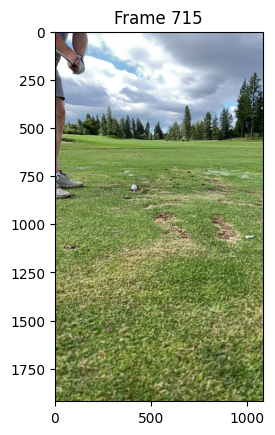

240.0


In [ ]:
import matplotlib.pyplot as plt
import cv2


# Load the original video
cap = cv2.VideoCapture("/content/drive/MyDrive/GolfDB/swing_video_files/down_the_line_official/IMG_7896.MOV")

# Initialize frame counter
frame_counter = 0

# Desired frame
desired_frame = 715



while cap.isOpened():

    ret, frame = cap.read()

    # If there are no more frames break the loop
    if not ret:
        break

    if frame_counter == desired_frame:
        # Convert the colorspace from BGR to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        bbox = (0, 50, 10, 30)    # 419, 776            433   755   109 323
        bbox = tuple(map(int, bbox))

        # Draw the bounding box on the frame
        cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)

        # Display the frame using matplotlib
        plt.imshow(frame)
        plt.title(f'Frame {frame_counter}')
        plt.show()

        # You can break the loop here if you don't need to process the remaining frames
        break

    frame_counter += 1  # increment frame counter
print(cap.get(cv2.CAP_PROP_FPS))
cap.release()

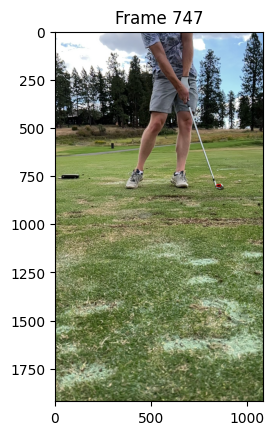

240.0


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the original video
cap = cv2.VideoCapture("/content/drive/MyDrive/GolfDB/swing_video_files/face_on_official/IMG_2215.MOV")

# Initialize frame counter
frame_counter = 0

# Desired frame
desired_frame = 747

while cap.isOpened():

    ret, frame = cap.read()

    # If there are no more frames break the loop
    if not ret:
        break

    if frame_counter == desired_frame:
        # Convert the colorspace from BGR to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        bbox = (840, 795, 860, 805)
        bbox = tuple(map(int, bbox))

        # Draw the bounding box on the frame
        cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)

        # Display the frame using matplotlib
        plt.imshow(frame)
        plt.title(f'Frame {frame_counter}')
        plt.show()

        # You can break the loop here if you don't need to process the remaining frames
        break

    frame_counter += 1  # increment frame counter
print(cap.get(cv2.CAP_PROP_FPS))
cap.release()

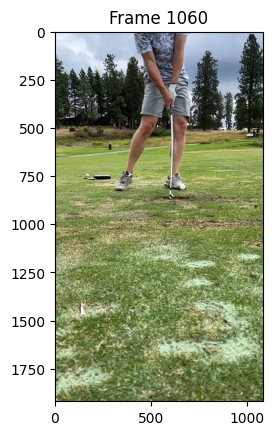

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the original video
c = cv2.VideoCapture(video_path)

# Set the frame to be read next
c.set(cv2.CAP_PROP_POS_FRAMES, 954)

# Read the frame
ret, frame = c.read()

# If the frame was read correctly ret is True
if ret:
    # Convert the colorspace from BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame)
    plt.title('Frame 1060')
    plt.show()
else:
    print('no')

c.release()

In [ ]:
import os
import random

import cv2
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

import pandas as pd

# Initialize an empty list to hold detection data
detection_data = []

tracker = DeepSort(max_age=5) #, embedder="clip_ViT-B/16")

cap = cv2.VideoCapture(video_path)

# Add a frame counter
frame_counter = 0

ret, frame = cap.read()

#fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#cap_out = cv2.VideoWriter('/content/output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (frame.shape[1], frame.shape[0]))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
frame_size = (frame.shape[1], frame.shape[0])
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f'FourCC code: mp4v')
print(f'Frame rate: {fps}')
print(f'Frame size: {frame_size}')
print(f'# Frames: {num_frames}')
print(video_path)

#cap_out = cv2.VideoWriter('/content/output.mp4', fourcc, 30, frame_size)

model = YOLO("/content/drive/MyDrive/GolfDB/train_yolo_model/code/runs_1920_2/detect/train/weights/best.pt")
#model = YOLO("/content/drive/MyDrive/GolfDB/train_yolo_model/code/runs_yaml_2/detect/train/weights/best.pt")

colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for j in range(10)]

detection_threshold = 0.1

while cap.isOpened():
  ret, frame = cap.read()

  # if there are no more frames break the loop
  if not ret:
    break

  # Only process certain frames
  if 200 <= frame_counter <= (num_frames - 300):
    results = model(frame)

    for result in results:
        detections = []
        for r in result.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = r
            x1 = int(x1)
            x2 = int(x2)
            y1 = int(y1)
            y2 = int(y2)
            class_id = int(class_id)
            if score > detection_threshold:
              detections.append(([x1, y1, x2-x1, y2-y1], score, class_id))
        tracks = tracker.update_tracks(detections, frame=frame)

        for track in tracks:
          if not track.is_confirmed():
            continue
          bbox = track.to_ltrb()
          track_id = track.track_id
          track_id = int(track_id)
          cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (colors[track_id % len(colors)]), 3)

          # Add detection data to the list as a dictionary
          detection_data.append({'frame': frame_counter, 'x1': bbox[0], 'y1': bbox[1], 'x2': bbox[2], 'y2': bbox[3], 'track_id': track_id, 'class_id': class_id, 'score': score})


  frame_counter += 1 # increment frame counter

cap.release()
#cap_out.release()
cv2.destroyAllWindows()

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(detection_data)